In [14]:
import prepare_data
import pandas as pd
import xgboost as xgb

In [137]:
id2label, label2id, submission_file, test_ids_final, test_ocr_clean, train_ids_final, train_labels_final, train_set_ocr = prepare_data.read_files()

In [138]:
train_data = pd.read_csv('train_data_modified.csv')
test_data = pd.read_csv('test_data_modified.csv')

In [9]:
test_final = pd.read_csv('df_test_final.csv')

In [139]:
train_data = train_data[train_data['isPolish'] == 0]
test_data = test_data[test_data['isPolish'] == 0]

In [10]:
test_final = test_final[test_final['isPolish'] == 0]

## Data Preparation

In [140]:
train_data

,Unnamed: 0.1,Unnamed: 0,File,Text ING,ID,Text Adam,Nrow,Text Adam pl,isPolish,isEnglish,isOther
1490,1490,1710,570492ae-1a40-40cf-8d45-ed3591ea74ae,"nazwisko): NIP; I przez miasta, inazwisko)H?U ...",20,( Sptelipeyiię zako a o boga | | MISONE 2 A LN...,20,( Sptelipeyiie zako a o boga | | MISONE 2 A LN...,0,0,1
1650,1650,3596,1f8d02ff-2739-4d5b-8029-3d01700acb2e,contributors MARK MANN's Potograrhs have THOMA...,0,contribułors - j MARIK MANU słetegahs hoc THOM...,51,contribulors - j MARIK MANU sletegahs hoc THOM...,0,1,0
1651,1651,8555,7b3ecce6-cea7-4378-af81-dab9434e8ca7,thing amnardiLmythat sj Sta adnoreanimaled ho ...,0,00000 RL W O OPR PA e thiagwarm aid ferry that...,122,00000 RL W O OPR PA e thiagwarm aid ferry that...,0,1,0
1652,1652,4794,2ac406e6-2fcd-45c1-989d-ee17fca95425,Catalina Marketing 365 West Passaic Strect Roc...,0,"s "" w EZIO ON PE TE FEB rare wd MO RR Gycle: 0...",25,"s "" w EZIO ON PE TE FEB rare wd MO RR Gycle: 0...",0,1,0
1653,1653,10120,78a696be-d7b7-4cb7-a37f-ee3587f601e2,IMAGE NOT AVAILABLE ONLINE The material refere...,0,IMAGE NOT AVAILABLE ONLINE The material refere...,9,IMAGE NOT AVAILABLE ONLINE The material refere...,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9750,9750,7098,6e914249-5314-46c6-bf95-f30228fb2b83,To: Weber Patti Itterman From: Jackie Klecan D...,7,"To: Boug Weber 3 Paki iermat> "" Fromm: Jackie ...",12,"To: Boug Weber 3 Paki iermat> "" Fromm: Jackie ...",0,1,0
9751,9751,7042,d3d18ddd-a110-443a-aa82-20b7864ba3b8,ZVSA Basehall IODAY Weexly Koith Cutler Publi...,7,"Keith Cutler Pdblsker, Bacebal Weekiy June 28,...",28,"Keith Cutler Pdblsker, Bacebal Weekiy June 28,...",0,1,0
9752,9752,4303,2061e531-a091-4f40-937f-a7fa8bada187,"PHILIP MORRIS US.4. ICD PAAK AVENUE New York, ...",7,"A 41% KEOMAS ć 9 y ST USA. 0 PARK AVENUE, NEM ...",39,"A 41% KEOMAS c 9 y ST USA. 0 PARK AVENUE, NEM ...",0,1,0
9753,9753,4455,39b58825-ae30-4376-b332-611b14d88d03,0ba Sil Eus Ovx 543 1052 M~ chro )50 352 M Lw;...,7,"EP A — O o 7 p"" pzzą 0. Te fo dzi: 843 1082 e”...",47,"EP A — O o 7 p"" pzza 0. Te fo dzi: 843 1082 e”...",0,1,0


In [141]:
df = train_data.drop(columns=['isPolish','Unnamed: 0','isEnglish', 'Text Adam'])
df = df.drop(columns=["Unnamed: 0.1"])

df_val = test_data.drop(columns=['isPolish','Unnamed: 0','isEnglish', 'Text Adam'])
df_val = df_val.drop(columns=["Unnamed: 0.1"])
df

,File,Text ING,ID,Nrow,Text Adam pl,isOther
1490,570492ae-1a40-40cf-8d45-ed3591ea74ae,"nazwisko): NIP; I przez miasta, inazwisko)H?U ...",20,20,( Sptelipeyiie zako a o boga | | MISONE 2 A LN...,1
1650,1f8d02ff-2739-4d5b-8029-3d01700acb2e,contributors MARK MANN's Potograrhs have THOMA...,0,51,contribulors - j MARIK MANU sletegahs hoc THOM...,0
1651,7b3ecce6-cea7-4378-af81-dab9434e8ca7,thing amnardiLmythat sj Sta adnoreanimaled ho ...,0,122,00000 RL W O OPR PA e thiagwarm aid ferry that...,0
1652,2ac406e6-2fcd-45c1-989d-ee17fca95425,Catalina Marketing 365 West Passaic Strect Roc...,0,25,"s "" w EZIO ON PE TE FEB rare wd MO RR Gycle: 0...",0
1653,78a696be-d7b7-4cb7-a37f-ee3587f601e2,IMAGE NOT AVAILABLE ONLINE The material refere...,0,9,IMAGE NOT AVAILABLE ONLINE The material refere...,0
...,...,...,...,...,...,...
9750,6e914249-5314-46c6-bf95-f30228fb2b83,To: Weber Patti Itterman From: Jackie Klecan D...,7,12,"To: Boug Weber 3 Paki iermat> "" Fromm: Jackie ...",0
9751,d3d18ddd-a110-443a-aa82-20b7864ba3b8,ZVSA Basehall IODAY Weexly Koith Cutler Publi...,7,28,"Keith Cutler Pdblsker, Bacebal Weekiy June 28,...",0
9752,2061e531-a091-4f40-937f-a7fa8bada187,"PHILIP MORRIS US.4. ICD PAAK AVENUE New York, ...",7,39,"A 41% KEOMAS c 9 y ST USA. 0 PARK AVENUE, NEM ...",0
9753,39b58825-ae30-4376-b332-611b14d88d03,0ba Sil Eus Ovx 543 1052 M~ chro )50 352 M Lw;...,7,47,"EP A — O o 7 p"" pzza 0. Te fo dzi: 843 1082 e”...",0


In [11]:
df_final = test_final.drop(columns=['isPolish','Unnamed: 0','isEnglish', 'Text Adam'])

In [15]:
import re
from fuzzywuzzy import fuzz

string_column = "Text Adam pl"
df[string_column] = df[string_column].astype(str)
df['string_length'] = df[string_column].apply(lambda x: len(x))

df['capital_letters_count'] = df[string_column].apply(lambda x: sum(1 for c in x if c.isupper()))

df['numbers_count'] = df[string_column].apply(lambda x: sum(1 for c in x if c.isdigit()))
df['question_marks_count'] = df[string_column].apply(lambda x: x.count('?'))
df['exclamation_marks_count'] = df[string_column].apply(lambda x: x.count('!'))
df['currency_signs_count'] = df[string_column].apply(lambda x: x.count('$') + x.count('€') + x.count('£'))


# american phone regex
pattern = r"\b\(?\d{3}\)?[-.\s]?\d{3}[-.\s]?\d{4}\b"

# american address regex
pattern1 = r"^\d+\s+([a-zA-Z]+\s+)+[a-zA-Z]+,\s*[A-Za-z]{2}\s*\d{5}(?:-\d{4})?$"

df['flag_phone'] = df[string_column].apply(lambda x: 1 if re.search(pattern, x) else 0)

pattern = r"\bi want it\b"

df['flag_text'] = df[string_column].apply(lambda x: 1 if re.search(pattern, x, re.IGNORECASE) else 0)





df_val[string_column] = df_val[string_column].astype(str)
df_val['string_length'] = df_val[string_column].apply(lambda x: len(x))

df_val['capital_letters_count'] = df_val[string_column].apply(lambda x: sum(1 for c in x if c.isupper()))

df_val['numbers_count'] = df_val[string_column].apply(lambda x: sum(1 for c in x if c.isdigit()))
df_val['question_marks_count'] = df_val[string_column].apply(lambda x: x.count('?'))
df_val['exclamation_marks_count'] = df_val[string_column].apply(lambda x: x.count('!'))
df_val['currency_signs_count'] = df_val[string_column].apply(lambda x: x.count('$') + x.count('€') + x.count('£'))


# american phone regex
pattern = r"\b\(?\d{3}\)?[-.\s]?\d{3}[-.\s]?\d{4}\b"

# american address regex
pattern1 = r"^\d+\s+([a-zA-Z]+\s+)+[a-zA-Z]+,\s*[A-Za-z]{2}\s*\d{5}(?:-\d{4})?$"

df_val['flag_phone'] = df_val[string_column].apply(lambda x: 1 if re.search(pattern, x) else 0)

pattern = r"\bi want it\b"

df_val['flag_text'] = df_val[string_column].apply(lambda x: 1 if re.search(pattern, x, re.IGNORECASE) else 0)

df

c:\Users\adamm\AppData\Local\Programs\Python\Python310\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


NameError: name 'df' is not defined

In [16]:
string_column = "Text Adam pl"

df_final[string_column] = df_final[string_column].astype(str)
df_final['string_length'] = df_final[string_column].apply(lambda x: len(x))

df_final['capital_letters_count'] = df_final[string_column].apply(lambda x: sum(1 for c in x if c.isupper()))

df_final['numbers_count'] = df_final[string_column].apply(lambda x: sum(1 for c in x if c.isdigit()))
df_final['question_marks_count'] = df_final[string_column].apply(lambda x: x.count('?'))
df_final['exclamation_marks_count'] = df_final[string_column].apply(lambda x: x.count('!'))
df_final['currency_signs_count'] = df_final[string_column].apply(lambda x: x.count('$') + x.count('€') + x.count('£'))


# american phone regex
pattern = r"\b\(?\d{3}\)?[-.\s]?\d{3}[-.\s]?\d{4}\b"

# american address regex
pattern1 = r"^\d+\s+([a-zA-Z]+\s+)+[a-zA-Z]+,\s*[A-Za-z]{2}\s*\d{5}(?:-\d{4})?$"

df_final['flag_phone'] = df_final[string_column].apply(lambda x: 1 if re.search(pattern, x) else 0)

pattern = r"\bi want it\b"

df_final['flag_text'] = df_final[string_column].apply(lambda x: 1 if re.search(pattern, x, re.IGNORECASE) else 0)


In [143]:
import nltk
import ipywidgets
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from tqdm.notebook import tqdm
tqdm.pandas()

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adamm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adamm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\adamm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\adamm\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [144]:
def preprocess_text(text):
    tokens = str(text).lower().split()
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

In [18]:
email_keywords = ["original message", "cc:", "subject:", "re:", "attachments"]
letter_keywords = ["dear", "regards", "sincerely", "miss", "sir"]
invoices_keywords = ["invoice", "voucher", "amount","description","estimate","rate","payment","price"]
forms_keywords = ["form","request","report","confidential"]
memos_keywords = ["memo","memorandum"]
budget_keywords = [
    "budget", "period", "cost", "expenditure", "subtotal", "total"
]
specification_keywords = ["specification", "spec"]
scientific_report_keywords = ["abstract", "introduction", "method", "results","curriculum vitae","biographical sketch","redacted material"]
advertisment_keywords = ["smoking",  "cigarettes"]




all_keywords = email_keywords + letter_keywords + invoices_keywords + forms_keywords + memos_keywords + budget_keywords + specification_keywords + scientific_report_keywords + advertisment_keywords
keywords_counter = dict(zip(all_keywords, [[] for i in range(len(all_keywords))]))

In [146]:
from collections import Counter
counter =0
for index, row in df.iterrows():
    for keyword in all_keywords:
        if re.findall(keyword,row['Text Adam pl'].lower()):
            keywords_counter[keyword].append(row['ID'])

for key, value in keywords_counter.items():
    print(f"Key: {key}, {Counter(value)}")



Key: original message, Counter({2: 12, 4: 8})
Key: cc:, Counter({2: 60, 8: 27, 7: 12, 4: 7, 9: 3, 5: 2, 6: 1, 15: 1, 16: 1, 13: 1})
Key: subject:, Counter({2: 241, 8: 150, 7: 59, 4: 32, 13: 4, 14: 3, 16: 2, 9: 1, 6: 1, 1: 1, 12: 1})
Key: re:, Counter({2: 95, 8: 78, 7: 77, 17: 52, 4: 38, 15: 29, 13: 28, 9: 26, 16: 25, 0: 17, 1: 17, 12: 16, 6: 9, 5: 7, 14: 6, 3: 5})
Key: attachments, Counter({2: 22, 8: 7, 4: 4, 7: 2, 16: 1})
Key: dear, Counter({7: 222, 13: 24, 15: 20, 5: 16, 4: 13, 9: 11, 2: 9, 1: 6, 14: 5, 0: 4, 8: 4, 17: 3, 16: 2, 3: 1, 6: 1, 12: 1})
Key: regards, Counter({7: 29, 8: 11, 4: 7, 2: 7, 16: 2, 6: 1, 15: 1})
Key: sincerely, Counter({7: 80, 4: 4, 5: 3, 13: 3, 12: 2, 8: 1})
Key: miss, Counter({4: 76, 7: 44, 9: 39, 12: 37, 14: 35, 15: 21, 6: 17, 1: 16, 2: 13, 8: 11, 13: 9, 0: 8, 16: 8, 17: 4, 5: 3})
Key: sir, Counter({15: 74, 9: 42, 7: 35, 4: 19, 1: 18, 0: 17, 8: 17, 16: 16, 14: 15, 13: 15, 5: 11, 6: 11, 12: 11, 17: 9, 2: 6, 3: 2})
Key: invoice, Counter({6: 87, 1: 19, 4: 6, 8: 

## Model

In [147]:
df

,File,Text ING,ID,Nrow,Text Adam pl,isOther,string_length,capital_letters_count,numbers_count,question_marks_count,exclamation_marks_count,currency_signs_count,flag_phone,flag_text
1490,570492ae-1a40-40cf-8d45-ed3591ea74ae,"nazwisko): NIP; I przez miasta, inazwisko)H?U ...",20,20,( Sptelipeyiie zako a o boga | | MISONE 2 A LN...,1,434,84,20,0,0,0,0,0
1650,1f8d02ff-2739-4d5b-8029-3d01700acb2e,contributors MARK MANN's Potograrhs have THOMA...,0,51,contribulors - j MARIK MANU sletegahs hoc THOM...,0,1723,463,18,1,0,0,0,0
1651,7b3ecce6-cea7-4378-af81-dab9434e8ca7,thing amnardiLmythat sj Sta adnoreanimaled ho ...,0,122,00000 RL W O OPR PA e thiagwarm aid ferry that...,0,2245,317,37,1,0,0,0,0
1652,2ac406e6-2fcd-45c1-989d-ee17fca95425,Catalina Marketing 365 West Passaic Strect Roc...,0,25,"s "" w EZIO ON PE TE FEB rare wd MO RR Gycle: 0...",0,488,176,29,0,0,0,0,0
1653,78a696be-d7b7-4cb7-a37f-ee3587f601e2,IMAGE NOT AVAILABLE ONLINE The material refere...,0,9,IMAGE NOT AVAILABLE ONLINE The material refere...,0,231,30,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9750,6e914249-5314-46c6-bf95-f30228fb2b83,To: Weber Patti Itterman From: Jackie Klecan D...,7,12,"To: Boug Weber 3 Paki iermat> "" Fromm: Jackie ...",0,302,18,16,0,0,0,0,0
9751,d3d18ddd-a110-443a-aa82-20b7864ba3b8,ZVSA Basehall IODAY Weexly Koith Cutler Publi...,7,28,"Keith Cutler Pdblsker, Bacebal Weekiy June 28,...",0,846,59,22,0,0,0,0,0
9752,2061e531-a091-4f40-937f-a7fa8bada187,"PHILIP MORRIS US.4. ICD PAAK AVENUE New York, ...",7,39,"A 41% KEOMAS c 9 y ST USA. 0 PARK AVENUE, NEM ...",0,1259,234,63,0,0,3,1,0
9753,39b58825-ae30-4376-b332-611b14d88d03,0ba Sil Eus Ovx 543 1052 M~ chro )50 352 M Lw;...,7,47,"EP A — O o 7 p"" pzza 0. Te fo dzi: 843 1082 e”...",0,2069,257,39,1,1,1,0,0


In [148]:
df2 = df[~df.ID.isin([10,11,18,19,20])]
df2_val = df_val[~df_val.ID.isin([10,11,18,19,20])]

In [19]:
for keyword in all_keywords:
    df2[keyword] = 0
    df2_val[keyword] = 0

for index, row in df2.iterrows():
    for keyword in all_keywords:
        df2.at[index, keyword] += len(re.findall(keyword,row[string_column].lower()))
        #df2.at[index, keyword] = 1 if fuzz.partial_ratio(keyword, row["Text Adam pl"].lower()) > 90 else 0

for index, row in df2_val.iterrows():
    for keyword in all_keywords:
        df2_val.at[index, keyword] += len(re.findall(keyword,row[string_column].lower()))

NameError: name 'df2' is not defined

In [20]:
for keyword in all_keywords:
    df_final[keyword] = 0
    df_final[keyword] = 0

for index, row in df_final.iterrows():
    for keyword in all_keywords:
        df_final.at[index, keyword] += len(re.findall(keyword,row[string_column].lower()))

In [150]:
df2

,File,Text ING,ID,Nrow,Text Adam pl,isOther,string_length,capital_letters_count,numbers_count,question_marks_count,...,spec,abstract,introduction,method,results,curriculum vitae,biographical sketch,redacted material,smoking,cigarettes
1650,1f8d02ff-2739-4d5b-8029-3d01700acb2e,contributors MARK MANN's Potograrhs have THOMA...,0,51,contribulors - j MARIK MANU sletegahs hoc THOM...,0,1723,463,18,1,...,0,0,0,0,0,0,0,0,1,0
1651,7b3ecce6-cea7-4378-af81-dab9434e8ca7,thing amnardiLmythat sj Sta adnoreanimaled ho ...,0,122,00000 RL W O OPR PA e thiagwarm aid ferry that...,0,2245,317,37,1,...,0,0,0,0,0,0,0,0,0,0
1652,2ac406e6-2fcd-45c1-989d-ee17fca95425,Catalina Marketing 365 West Passaic Strect Roc...,0,25,"s "" w EZIO ON PE TE FEB rare wd MO RR Gycle: 0...",0,488,176,29,0,...,0,0,0,0,0,0,0,0,0,0
1653,78a696be-d7b7-4cb7-a37f-ee3587f601e2,IMAGE NOT AVAILABLE ONLINE The material refere...,0,9,IMAGE NOT AVAILABLE ONLINE The material refere...,0,231,30,0,0,...,0,0,0,0,0,0,0,0,0,0
1654,1f3fbdca-c2be-44c9-b788-eed483a8e9ae,Currently sold only surgeon GeNEAal'S WarNing ...,0,31,SURGEON GENENAL'S WARNING; Smoking Currently s...,0,699,234,7,0,...,0,0,0,0,0,0,0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9750,6e914249-5314-46c6-bf95-f30228fb2b83,To: Weber Patti Itterman From: Jackie Klecan D...,7,12,"To: Boug Weber 3 Paki iermat> "" Fromm: Jackie ...",0,302,18,16,0,...,0,0,0,0,0,0,0,0,0,0
9751,d3d18ddd-a110-443a-aa82-20b7864ba3b8,ZVSA Basehall IODAY Weexly Koith Cutler Publi...,7,28,"Keith Cutler Pdblsker, Bacebal Weekiy June 28,...",0,846,59,22,0,...,0,0,0,0,0,0,0,0,0,0
9752,2061e531-a091-4f40-937f-a7fa8bada187,"PHILIP MORRIS US.4. ICD PAAK AVENUE New York, ...",7,39,"A 41% KEOMAS c 9 y ST USA. 0 PARK AVENUE, NEM ...",0,1259,234,63,0,...,0,0,0,0,0,0,0,0,0,0
9753,39b58825-ae30-4376-b332-611b14d88d03,0ba Sil Eus Ovx 543 1052 M~ chro )50 352 M Lw;...,7,47,"EP A — O o 7 p"" pzza 0. Te fo dzi: 843 1082 e”...",0,2069,257,39,1,...,1,0,0,0,0,0,0,0,0,0


In [151]:
mapping = dict(zip([ 0,  1,  2,  3,  4 , 5,  6,  7,  8 , 9 ,12, 13, 14, 15, 16 ,17],[ 0,  1 , 2,  3 , 4 , 5 , 6 , 7,  8,  9 ,10 ,11 ,12, 13, 14 ,15] ))
reverse_mapping = dict(zip([ 0,  1,  2,  3,  4 , 5,  6,  7,  8 , 9 ,10 ,11 ,12, 13, 14 ,15],[ 0,  1 , 2,  3 , 4 , 5 , 6 , 7,  8,  9 ,12, 13, 14, 15, 16 ,17] ))

In [152]:
df2["ID"]=df2["ID"].map(mapping).astype(int)
df2_val["ID"]=df2_val["ID"].map(mapping).astype(int)

C:\Users\adamm\AppData\Local\Temp\ipykernel_20308\2915549792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["ID"]=df2["ID"].map(mapping).astype(int)


In [21]:
df2["capital_letters_count"] = df2["capital_letters_count"] / (df2["string_length"]+1)
df2_val["capital_letters_count"] = df2_val["capital_letters_count"] / (df2_val["string_length"]+1)

NameError: name 'df2' is not defined

In [22]:
df_final["capital_letters_count"] = df_final["capital_letters_count"] / (df_final["string_length"]+1)


In [23]:
print(df_final.shape)

(2939, 55)


In [24]:
df_final

,FileLong,Text ING,File,Nrow,Text Adam pl,isOther,string_length,capital_letters_count,numbers_count,question_marks_count,...,spec,abstract,introduction,method,results,curriculum vitae,biographical sketch,redacted material,smoking,cigarettes
546,605d2b51-afcf-4843-84cc-3569e1dc7423.tiff,"~ileeln Oszns Iblwmua eton Jtl , ty ee Duu' sh...",605d2b51-afcf-4843-84cc-3569e1dc7423,15,NE ht Mice same P zkenynzo ta. -faw Zu Ma >pit...,0,362,0.347107,5,0,...,0,0,0,0,0,0,0,0,0,0
547,2a36a287-e212-4f8a-b690-f94581a70484.tiff,KOQL_Super _Lights Mail in Coupon Qifer Offer ...,2a36a287-e212-4f8a-b690-f94581a70484,41,C ' KOOL Super Lights Mail-in Coupon Offer Off...,0,1361,0.127019,36,0,...,0,0,0,0,0,0,0,0,0,0
548,ce2ff144-5269-4947-9f5c-544572ba2efa.tiff,"X h+ 9 L { 7, 2 3 8 8 12 V [ L 2 J } 4 J | ] |...",ce2ff144-5269-4947-9f5c-544572ba2efa,38,"OESOZZZEEEEEEEEEEZ na e 5 j ""SE z ( Fae? | Ba...",1,543,0.237132,66,1,...,0,0,0,0,0,0,0,0,0,0
549,b402c2e0-2299-4c4a-9202-bf8e791e24fa.tiff,Uusc 9536/90/1802 016ji0r.ooio Drlc MITA MOLIS...,b402c2e0-2299-4c4a-9202-bf8e791e24fa,58,"awe iezaRODA too m"". AWA Oda ar amas ad Zooni ...",0,3342,0.081962,69,0,...,0,0,1,0,0,0,0,0,0,0
550,313e9777-4170-400b-a563-7597af1dad7b.tiff,"Fromipinal Messageevy, Carolyn _ J San Wednesd...",313e9777-4170-400b-a563-7597af1dad7b,28,R E) Ej jj E 8 Ona Massage — Z Gm lo. Ory 3 ...,0,273,0.156934,8,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3486,eb2705bc-3267-4e07-a596-ed92f48aa680.tiff,"Nancy Coleman 6831 Ridge Blvd. 414 BrockIyn, N...",eb2705bc-3267-4e07-a596-ed92f48aa680,31,"a Nancy Coleman KARA 6831 Ridge Blvd., *14 Bro...",0,891,0.089686,51,0,...,0,0,0,0,0,0,0,0,0,0
3487,2eb16f23-d508-4d2f-94cb-096707d314ec.tiff,20733788/7 DEC_15.19393 40.22pM1 No.689 P.1/ T...,2eb16f23-d508-4d2f-94cb-096707d314ec,10,"2013919811 - . Nee.gntow orze ""ETEE KAR"" . - ...",0,134,0.133333,17,0,...,0,0,0,0,0,0,0,0,0,0
3488,2ec55c3b-9e9e-4bef-b1e0-e49e568bdb70.tiff,AXXALS OF THE *EIv YORR ACADEMY OF sciecs VOLU...,2ec55c3b-9e9e-4bef-b1e0-e49e568bdb70,11,00000 m nne NN SE miekka 77 w a Roh pawtremej ...,0,238,0.506276,24,0,...,0,0,0,0,0,0,0,0,0,0
3489,33973f8c-7cb7-4495-91d9-65f98b4a1f11.tiff,SENT BY :Mezz ina/Br 0wn Inc_ 3-92 4:51PM 21...,33973f8c-7cb7-4495-91d9-65f98b4a1f11,29,SENT BY:Mezz |na/Brown Inc. 1 4- 8-92 ; 4:51PM...,0,905,0.242826,46,1,...,1,0,0,0,0,0,0,0,0,0


In [154]:
print(df2.shape)
print(df2_val.shape)

(8075, 55)
(907, 55)


In [25]:
import pandas as pd
import glob

file_paths = glob.glob('HackING_mISIe-test/*.csv')  # Replace 'path/to/csv/files/' with your actual file path

dfs_metr = []

for file_path in file_paths:
    df_metr = pd.read_csv(file_path)
    dfs_metr.append(df_metr)

combined_df_metr_test = pd.concat(dfs_metr, ignore_index=True)

combined_df_metr_test

,Unnamed: 0,filepath,numberEmpty,nonWhiteFraction,possibleShapes,possibleImages,nonEmptySections
0,0,./DANE/test_set/0009d485-11a3-4299-b19d-1cc37b...,0.044156,0.066297,0.0,0.0,0.666667
1,1,./DANE/test_set/000ea643-eda4-4ab6-aa39-65f378...,0.049133,0.094087,2.0,2.0,1.000000
2,2,./DANE/test_set/00246a52-7855-4888-bc8a-45353c...,0.125000,0.028860,0.0,0.0,1.000000
3,3,./DANE/test_set/002d3899-1822-4a81-9387-86dfe0...,0.075188,0.113993,1.0,1.0,1.000000
4,4,./DANE/test_set/002d3ab1-166e-4ce7-9c8e-e9961c...,0.086514,0.029976,1.0,1.0,1.000000
...,...,...,...,...,...,...,...
3487,395,./DANE/test_set/5976f2ff-8d3d-472b-baef-359d9e...,0.097087,0.459593,1.0,1.0,1.000000
3488,396,./DANE/test_set/5988ce6b-74ed-4296-ac75-1bca1e...,0.235669,0.562779,1.0,1.0,0.333333
3489,397,./DANE/test_set/5988f8cd-5fe2-4b57-9cb6-7797ea...,0.051948,0.040808,1.0,1.0,0.666667
3490,398,./DANE/test_set/598928c7-dff3-409d-b7ab-24d6c4...,0.049020,0.023174,0.0,0.0,1.000000


In [155]:
import pandas as pd
import glob

file_paths = glob.glob('HackING_mISIe_full_train/*.csv')  # Replace 'path/to/csv/files/' with your actual file path

dfs_metr = []

for file_path in file_paths:
    df_metr = pd.read_csv(file_path)
    dfs_metr.append(df_metr)

combined_df_metr = pd.concat(dfs_metr, ignore_index=True)

combined_df_metr

,Unnamed: 0,filepath,numberEmpty,nonWhiteFraction,possibleShapes,possibleImages,nonEmptySections
0,0,./DANE/train_set/advertisement\00133f89-017d-4...,0.146341,0.575719,4,2,0.500000
1,1,./DANE/train_set/advertisement\00a3e900-6616-4...,0.161616,0.722688,2,1,0.500000
2,2,./DANE/train_set/advertisement\0116aef3-5834-4...,0.210526,0.086930,5,5,0.333333
3,3,./DANE/train_set/advertisement\024b107d-cd7f-4...,0.133333,0.814986,1,1,0.500000
4,4,./DANE/train_set/advertisement\0296a9e1-5bec-4...,0.142857,0.324584,2,2,0.500000
...,...,...,...,...,...,...,...
10844,195,./DANE/train_set/umowa_na_odleglosc_odstapieni...,0.187500,0.017731,0,0,0.500000
10845,196,./DANE/train_set/umowa_na_odleglosc_odstapieni...,0.148148,0.021621,0,0,0.750000
10846,197,./DANE/train_set/umowa_na_odleglosc_odstapieni...,0.065574,0.018559,0,0,1.000000
10847,198,./DANE/train_set/umowa_na_odleglosc_odstapieni...,0.121739,0.014643,0,0,1.000000


In [156]:
combined_df_metr['File'] = combined_df_metr['filepath'].apply(lambda x : x.split("\\")[-1].split('.')[0] )
combined_df_metr1 = combined_df_metr.drop(columns=['Unnamed: 0','filepath'])

In [39]:
combined_df_metr_test['File'] = combined_df_metr_test['filepath'].apply(lambda x : x.split("/")[-1].split('.')[0] )
combined_df_metr_f = combined_df_metr_test.drop(columns=['Unnamed: 0','filepath'])

In [40]:
combined_df_metr_f

,numberEmpty,nonWhiteFraction,possibleShapes,possibleImages,nonEmptySections,File
0,0.044156,0.066297,0.0,0.0,0.666667,0009d485-11a3-4299-b19d-1cc37bc0f7fb
1,0.049133,0.094087,2.0,2.0,1.000000,000ea643-eda4-4ab6-aa39-65f3787d522d
2,0.125000,0.028860,0.0,0.0,1.000000,00246a52-7855-4888-bc8a-45353c0a5888
3,0.075188,0.113993,1.0,1.0,1.000000,002d3899-1822-4a81-9387-86dfe0387feb
4,0.086514,0.029976,1.0,1.0,1.000000,002d3ab1-166e-4ce7-9c8e-e9961cecb736
...,...,...,...,...,...,...
3487,0.097087,0.459593,1.0,1.0,1.000000,5976f2ff-8d3d-472b-baef-359d9eec7a3f
3488,0.235669,0.562779,1.0,1.0,0.333333,5988ce6b-74ed-4296-ac75-1bca1eb28401
3489,0.051948,0.040808,1.0,1.0,0.666667,5988f8cd-5fe2-4b57-9cb6-7797ea44bf34
3490,0.049020,0.023174,0.0,0.0,1.000000,598928c7-dff3-409d-b7ab-24d6c41be9d7


In [157]:
combined_df_metr1

,numberEmpty,nonWhiteFraction,possibleShapes,possibleImages,nonEmptySections,File
0,0.146341,0.575719,4,2,0.500000,00133f89-017d-44f5-a549-e11cf5b5221a
1,0.161616,0.722688,2,1,0.500000,00a3e900-6616-46fe-a528-a5ac51952562
2,0.210526,0.086930,5,5,0.333333,0116aef3-5834-4a14-8dc0-e7eb3d79f5de
3,0.133333,0.814986,1,1,0.500000,024b107d-cd7f-4f81-a28c-50a9df08d586
4,0.142857,0.324584,2,2,0.500000,0296a9e1-5bec-456f-9e9c-fc8849203056
...,...,...,...,...,...,...
10844,0.187500,0.017731,0,0,0.500000,b70bbd24-3389-48a6-844b-6a3b20457e04
10845,0.148148,0.021621,0,0,0.750000,ba63205f-5084-4bbd-a620-4107ee2b6fad
10846,0.065574,0.018559,0,0,1.000000,bb6ebdb4-fb65-4b76-8a78-ea4a17ba942f
10847,0.121739,0.014643,0,0,1.000000,bc0f55f6-35a4-4de7-85e7-c2ff98b0efcc


In [158]:
df3  = df2.merge(combined_df_metr1,on='File')
df3_val  = df2_val.merge(combined_df_metr1,on='File')

In [41]:
df2_final  = df_final.merge(combined_df_metr_f,on='File')

In [36]:
df_final

,FileLong,Text ING,File,Nrow,Text Adam pl,isOther,string_length,capital_letters_count,numbers_count,question_marks_count,...,spec,abstract,introduction,method,results,curriculum vitae,biographical sketch,redacted material,smoking,cigarettes
546,605d2b51-afcf-4843-84cc-3569e1dc7423.tiff,"~ileeln Oszns Iblwmua eton Jtl , ty ee Duu' sh...",605d2b51-afcf-4843-84cc-3569e1dc7423,15,NE ht Mice same P zkenynzo ta. -faw Zu Ma >pit...,0,362,0.347107,5,0,...,0,0,0,0,0,0,0,0,0,0
547,2a36a287-e212-4f8a-b690-f94581a70484.tiff,KOQL_Super _Lights Mail in Coupon Qifer Offer ...,2a36a287-e212-4f8a-b690-f94581a70484,41,C ' KOOL Super Lights Mail-in Coupon Offer Off...,0,1361,0.127019,36,0,...,0,0,0,0,0,0,0,0,0,0
548,ce2ff144-5269-4947-9f5c-544572ba2efa.tiff,"X h+ 9 L { 7, 2 3 8 8 12 V [ L 2 J } 4 J | ] |...",ce2ff144-5269-4947-9f5c-544572ba2efa,38,"OESOZZZEEEEEEEEEEZ na e 5 j ""SE z ( Fae? | Ba...",1,543,0.237132,66,1,...,0,0,0,0,0,0,0,0,0,0
549,b402c2e0-2299-4c4a-9202-bf8e791e24fa.tiff,Uusc 9536/90/1802 016ji0r.ooio Drlc MITA MOLIS...,b402c2e0-2299-4c4a-9202-bf8e791e24fa,58,"awe iezaRODA too m"". AWA Oda ar amas ad Zooni ...",0,3342,0.081962,69,0,...,0,0,1,0,0,0,0,0,0,0
550,313e9777-4170-400b-a563-7597af1dad7b.tiff,"Fromipinal Messageevy, Carolyn _ J San Wednesd...",313e9777-4170-400b-a563-7597af1dad7b,28,R E) Ej jj E 8 Ona Massage — Z Gm lo. Ory 3 ...,0,273,0.156934,8,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3486,eb2705bc-3267-4e07-a596-ed92f48aa680.tiff,"Nancy Coleman 6831 Ridge Blvd. 414 BrockIyn, N...",eb2705bc-3267-4e07-a596-ed92f48aa680,31,"a Nancy Coleman KARA 6831 Ridge Blvd., *14 Bro...",0,891,0.089686,51,0,...,0,0,0,0,0,0,0,0,0,0
3487,2eb16f23-d508-4d2f-94cb-096707d314ec.tiff,20733788/7 DEC_15.19393 40.22pM1 No.689 P.1/ T...,2eb16f23-d508-4d2f-94cb-096707d314ec,10,"2013919811 - . Nee.gntow orze ""ETEE KAR"" . - ...",0,134,0.133333,17,0,...,0,0,0,0,0,0,0,0,0,0
3488,2ec55c3b-9e9e-4bef-b1e0-e49e568bdb70.tiff,AXXALS OF THE *EIv YORR ACADEMY OF sciecs VOLU...,2ec55c3b-9e9e-4bef-b1e0-e49e568bdb70,11,00000 m nne NN SE miekka 77 w a Roh pawtremej ...,0,238,0.506276,24,0,...,0,0,0,0,0,0,0,0,0,0
3489,33973f8c-7cb7-4495-91d9-65f98b4a1f11.tiff,SENT BY :Mezz ina/Br 0wn Inc_ 3-92 4:51PM 21...,33973f8c-7cb7-4495-91d9-65f98b4a1f11,29,SENT BY:Mezz |na/Brown Inc. 1 4- 8-92 ; 4:51PM...,0,905,0.242826,46,1,...,1,0,0,0,0,0,0,0,0,0


In [42]:
y_last = df2_final["FileLong"]
X_last = df2_final.drop(columns=["File",'FileLong',"Text ING", "Text Adam pl",'Nrow'])


In [159]:
y_train = df3["ID"]
X_train = df3.drop(columns=["File","Text ING", "ID", "Text Adam pl",'Nrow'])

y_test = df3_val["ID"]
X_val = df3_val.drop(columns=["File","Text ING", "ID", "Text Adam pl",'Nrow'])

In [160]:
len(pd.unique(y_train))

16

In [161]:
X_train

,isOther,string_length,capital_letters_count,numbers_count,question_marks_count,exclamation_marks_count,currency_signs_count,flag_phone,flag_text,original message,...,curriculum vitae,biographical sketch,redacted material,smoking,cigarettes,numberEmpty,nonWhiteFraction,possibleShapes,possibleImages,nonEmptySections
0,0,1723,0.268561,18,1,0,0,0,0,0,...,0,0,0,1,0,0.063953,0.407737,10,10,1.000000
1,0,2245,0.141140,37,1,0,0,0,0,0,...,0,0,0,0,0,0.017199,0.460661,1,1,0.750000
2,0,488,0.359918,29,0,0,0,0,0,0,...,0,0,0,0,0,0.181818,0.183766,8,4,1.000000
3,0,231,0.129310,0,0,0,0,0,0,0,...,0,0,0,0,0,0.043478,0.058376,0,0,0.666667
4,0,699,0.334286,7,0,0,0,0,0,0,...,0,0,0,4,0,0.108974,0.297160,4,3,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8070,0,302,0.059406,16,0,0,0,0,0,0,...,0,0,0,0,0,0.081395,0.016436,1,1,0.750000
8071,0,846,0.069658,22,0,0,0,0,0,0,...,0,0,0,0,0,0.071429,0.048382,2,2,1.000000
8072,0,1259,0.185714,63,0,0,3,1,0,0,...,0,0,0,0,0,0.079861,0.036614,0,0,0.666667
8073,0,2069,0.124155,39,1,1,1,0,0,0,...,0,0,0,0,0,0.016129,0.072717,1,1,1.000000


In [162]:
X_val

,isOther,string_length,capital_letters_count,numbers_count,question_marks_count,exclamation_marks_count,currency_signs_count,flag_phone,flag_text,original message,...,curriculum vitae,biographical sketch,redacted material,smoking,cigarettes,numberEmpty,nonWhiteFraction,possibleShapes,possibleImages,nonEmptySections
0,1,1371,0.450437,48,0,0,2,0,0,0,...,0,0,0,0,0,0.148515,0.272017,4,4,0.666667
1,0,622,0.065811,2,0,0,0,0,0,0,...,0,0,0,0,0,0.088608,0.067392,4,2,0.666667
2,1,1095,0.470803,26,0,0,2,0,0,0,...,0,0,0,0,0,0.222222,0.506489,8,8,0.750000
3,0,478,0.304802,20,0,0,0,0,0,0,...,0,0,0,0,0,0.200000,0.837641,2,2,0.666667
4,0,1912,0.192891,21,0,0,0,0,0,0,...,0,0,0,0,1,0.038328,0.222791,2,1,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0,1508,0.145129,58,0,0,0,0,0,0,...,0,0,0,0,0,0.056548,0.072587,2,2,1.000000
903,0,1497,0.140854,50,0,0,1,0,0,0,...,0,0,0,0,0,0.034602,0.053375,1,1,0.750000
904,0,1403,0.184473,133,0,2,2,1,0,0,...,0,0,0,0,0,0.048276,0.073265,1,1,1.000000
905,0,1164,0.095279,48,0,0,0,0,0,0,...,0,0,0,0,0,0.062016,0.043456,1,0,1.000000


In [163]:
# import xgboost as xgb
# from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

# dtrain = xgb.DMatrix(X_train, label=y_train)
# dval = xgb.DMatrix(X_val, label=y_test)

# params = {
#     'objective': 'multi:softmax',
#     'eval_metric': 'mlogloss',
#     'eta': 0.1,
#     'max_depth': 7,
#     'learning_rate':0.04, 
#     'booster':'gbtree',
#     'num_class' : 16
# }

# model = xgb.train(params, dtrain, num_boost_round=700, evals=[(dval, 'validation')],
#                   early_stopping_rounds=5)

# y_pred = model.predict(dval)

In [164]:
# d = xgb.DMatrix(X_train)

# y_pred_val = model.predict(d)

# print('Train:')
# print(f'Accuracy Score: {accuracy_score(y_train,y_pred_val)}')
# print(f'Confusion Matrix: \n{confusion_matrix(y_train, y_pred_val)}')
# print(f'Recall score: {recall_score(y_train,y_pred_val, average="micro")}')
# print(f"Precision score: {precision_score(y_train,y_pred_val, average='micro')}")

In [165]:
# d = xgb.DMatrix(X_val)

# y_pred_val = model.predict(d)

# print('Validate:')
# print(f'Accuracy Score: {accuracy_score(y_test,y_pred_val)}')
# print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_val)}')
# print(f'Recall score: {recall_score(y_test,y_pred_val, average="micro")}')
# print(f"Precision score: {precision_score(y_test,y_pred_val, average='micro')}")

In [166]:
# model.save_model("xgboost_model_new.json")

In [167]:
# model.get_score(importance_type='gain')

In [168]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [169]:
tree = RandomForestClassifier(max_depth=7)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_val)

print('Validate:')
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred, average="micro")}')
print(f"Precision score: {precision_score(y_test,y_pred, average='micro')}")



Validate:
Accuracy Score: 0.45755237045203967
Confusion Matrix: 
[[32  1  0  9  2  2  3  1  0  1  3  2  0  2  0  0]
 [ 4 18  1  3  1  4 15  1  1  0  3  0  1  0  2  2]
 [ 3  0 43  2  1  0  1  0  2  0  1  0  0  2  2  0]
 [10  0  0 42  0  2  0  0  0  0  3  0  0  0  0  0]
 [ 4  5  0  2 12  9  6  2  2  0  4  1  1  3  0  6]
 [ 7  1  1 10  1 30  3  0  1  0  6  1  0  0  0  0]
 [ 6 11  1  2  0  3 30  0  0  0  1  0  1  0  0  1]
 [ 1  0  2  0  2  3  0 23 11  0  6  1  1  2  2  2]
 [ 3  2  2  1  1  1  3  1 22  0  8  0  2  5  3  2]
 [ 2  1  1  0  2  5  3  0  0  3 11  2  3 15  2  1]
 [ 4  4  2  5  0  7  2  1  1  0 23  0  0  7  2  1]
 [ 3  1  0  3  1 10  4  3  0  0  2 24  1  1  0  3]
 [ 0  0  2  1  1  0  0  2  0  0  4  0 36  7  2  2]
 [ 2  0  1  2  1  0  0  0  0  3  4  0  3 41  0  1]
 [ 7  5  3  2  3  7  5  0  2  0  6  0  3  6  6  4]
 [ 1  0  0  1  4  4  6  0  0  0  0  0  6  1  0 30]]
Recall score: 0.45755237045203967
Precision score: 0.45755237045203967


# grid search for Random Forest
from sklearn.model_selection import GridSearchCV, train_test_split
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a random forest classifier
rf = RandomForestClassifier()

# Create the grid search object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

In [30]:
# read json model
import json

with open('xgboost_model_new.json', 'r') as f:
    model_json = json.load(f)

# load model
import xgboost as xgb

model = xgb.Booster(model_file='xgboost_model_new.json')

# predict


[12:23:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:888: Found JSON model saved before XGBoost 1.6, please save the model using current version again. The support for old JSON model will be discontinued in XGBoost 2.3.


In [43]:
d = xgb.DMatrix(X_last)
y_pred = model.predict(d)


In [45]:
y_last

0       605d2b51-afcf-4843-84cc-3569e1dc7423.tiff
1       2a36a287-e212-4f8a-b690-f94581a70484.tiff
2       ce2ff144-5269-4947-9f5c-544572ba2efa.tiff
3       b402c2e0-2299-4c4a-9202-bf8e791e24fa.tiff
4       313e9777-4170-400b-a563-7597af1dad7b.tiff
                          ...                    
2934    eb2705bc-3267-4e07-a596-ed92f48aa680.tiff
2935    2eb16f23-d508-4d2f-94cb-096707d314ec.tiff
2936    2ec55c3b-9e9e-4bef-b1e0-e49e568bdb70.tiff
2937    33973f8c-7cb7-4495-91d9-65f98b4a1f11.tiff
2938    4098ee5a-b4e5-43ce-ad50-f0892c19b33c.tiff
Name: FileLong, Length: 2939, dtype: object

In [52]:
df

,File,pred
0,e9fdc30e-99bd-4df8-ac68-adab008dfc88.jpg,10
1,1131d492-9670-4cf3-876b-d7d63fdb93cf.jpg,10
2,a10b2b27-b827-417c-8158-87c607516275.jpg,20
3,f72c1791-2966-4751-885a-f8575b529811.jpg,10
4,3acc02fa-164e-43d2-899a-82f16ef56dd8.jpg,10
...,...,...
547,aebc2f61-bafd-4e96-a001-bf62b0607778.tiff,18
548,5a8d15b6-1a05-4151-a00e-6c7ac19ef85d.tiff,18
549,bca5e91c-d6c4-4055-85ce-d3e7c7d7ec42.tiff,18
550,e317acfd-8926-43d4-bab2-74b19b22668f.tiff,18


In [49]:
df2

,path,pred
0,605d2b51-afcf-4843-84cc-3569e1dc7423.tiff,5.0
1,2a36a287-e212-4f8a-b690-f94581a70484.tiff,8.0
2,ce2ff144-5269-4947-9f5c-544572ba2efa.tiff,10.0
3,b402c2e0-2299-4c4a-9202-bf8e791e24fa.tiff,13.0
4,313e9777-4170-400b-a563-7597af1dad7b.tiff,2.0
...,...,...
2934,eb2705bc-3267-4e07-a596-ed92f48aa680.tiff,7.0
2935,2eb16f23-d508-4d2f-94cb-096707d314ec.tiff,2.0
2936,2ec55c3b-9e9e-4bef-b1e0-e49e568bdb70.tiff,1.0
2937,33973f8c-7cb7-4495-91d9-65f98b4a1f11.tiff,4.0


In [51]:
df = df.drop(columns=['Unnamed: 0'])

In [53]:
df['path'] = df['File']

In [54]:
df = df.drop(columns=['File'])

In [55]:
df

,pred,path
0,10,e9fdc30e-99bd-4df8-ac68-adab008dfc88.jpg
1,10,1131d492-9670-4cf3-876b-d7d63fdb93cf.jpg
2,20,a10b2b27-b827-417c-8158-87c607516275.jpg
3,10,f72c1791-2966-4751-885a-f8575b529811.jpg
4,10,3acc02fa-164e-43d2-899a-82f16ef56dd8.jpg
...,...,...
547,18,aebc2f61-bafd-4e96-a001-bf62b0607778.tiff
548,18,5a8d15b6-1a05-4151-a00e-6c7ac19ef85d.tiff
549,18,bca5e91c-d6c4-4055-85ce-d3e7c7d7ec42.tiff
550,18,e317acfd-8926-43d4-bab2-74b19b22668f.tiff


In [58]:
df3 = pd.concat([df2, df])

In [61]:
# rename path to filepath
df3 = df3.rename(columns={'path': 'filepath'})

# save to csv
df3.to_csv('Final preds.csv')

In [47]:
df2 = pd.DataFrame({'path':y_last,'pred':y_pred})
df2.to_csv("pred2.csv",index=False)

# read predictions.csv

df = pd.read_csv("predictions.csv")

# append df2 and df





AttributeError: 'DataFrame' object has no attribute 'append'

In [170]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

xgb_model = xgb.XGBClassifier()

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)




KeyboardInterrupt: 

In [171]:
xgb_model2 = xgb.XGBClassifier(**best_params)
xgb_model2.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [172]:
best_params

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

In [173]:
import numpy as np

Validate:
Accuracy Score: 0.5611907386990077
Recall score: 0.5611716993600256
Precision score: 0.5789905890822475
F1 score: 0.5637961655038791


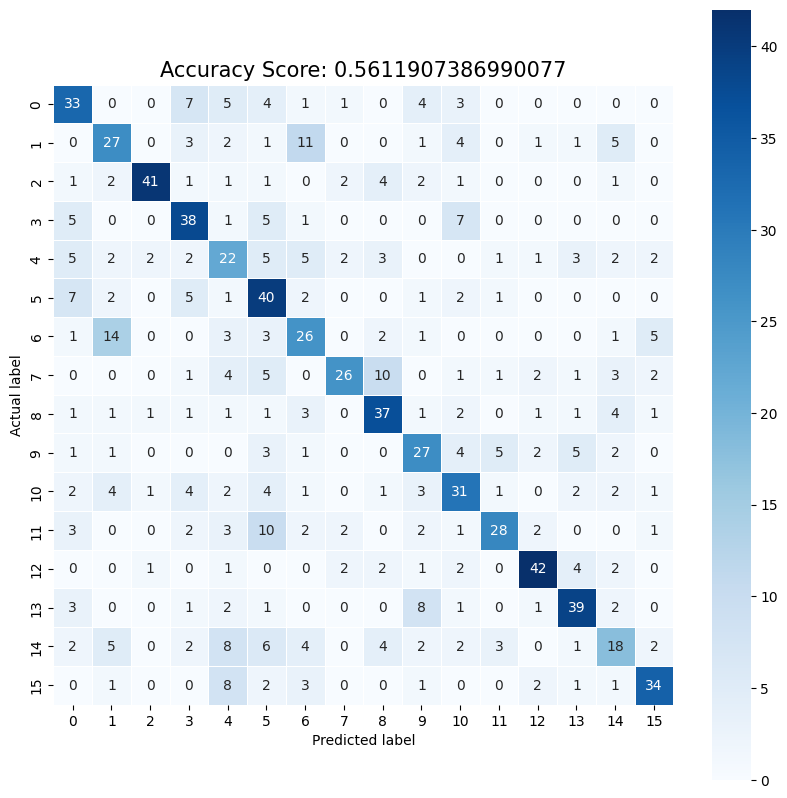

Train:
Accuracy Score: 0.8546130030959752
Recall score: 0.854724743089263
Precision score: 0.8604555985250943
F1 score: 0.8557380722824571


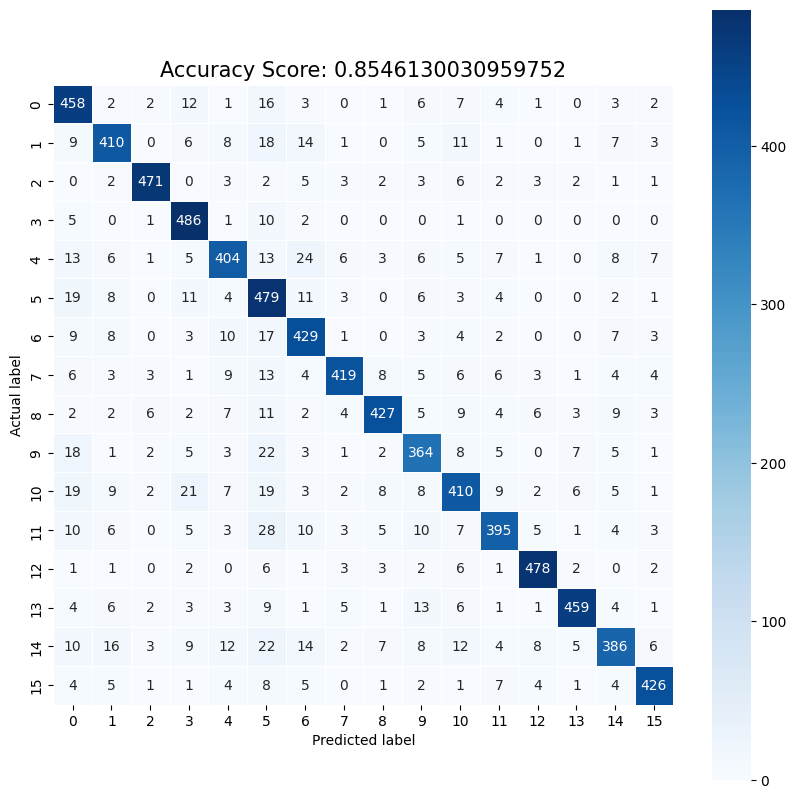

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


y_pred = xgb_model2.predict(X_val)

print('Validate:')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred, average="macro")}')
print(f"Precision score: {precision_score(y_test,y_pred, average='macro')}")
print(f"F1 score: {f1_score(y_test,y_pred, average='macro')}")


# confusion matrix plot

# reverse mapping of labels

plt.figure(figsize=(10,10))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15)
plt.show()




y_pred = xgb_model2.predict(X_train)

print('Train:')
print(f'Accuracy Score: {accuracy_score(y_train,y_pred)}')
print(f'Recall score: {recall_score(y_train,y_pred, average="macro")}')
print(f"Precision score: {precision_score(y_train,y_pred, average='macro')}")
print(f"F1 score: {f1_score(y_train,y_pred, average='macro')}")

# confusion matrix plot

plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_train,y_pred))
plt.title(all_sample_title, size = 15)
plt.show()



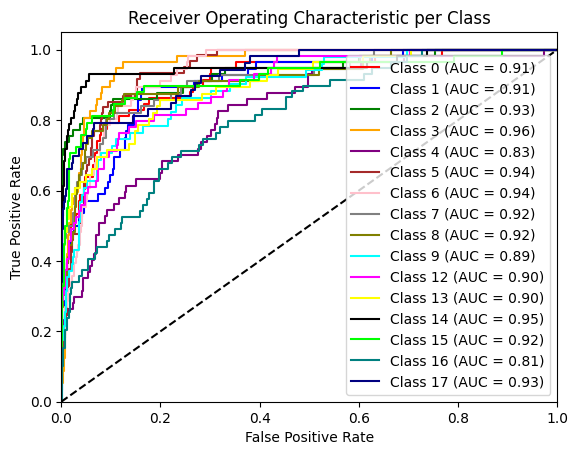

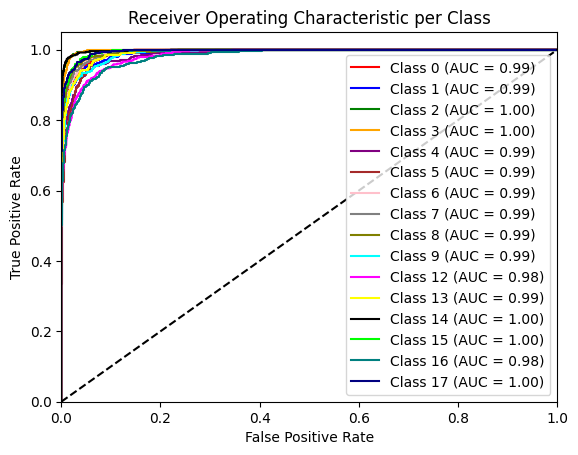

In [175]:

# calculate roc auc per class

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred = xgb_model2.predict_proba(X_val)

colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow', 'black', 'lime', 'teal', 'navy']


y_test_bin = label_binarize(y_test, classes=[i for i in range(16)])

roc_auc_score(y_test_bin, y_pred, average='macro')

fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure()

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Class %d (AUC = %0.2f)' % (reverse_mapping[i], roc_auc[i]), color=colors[i])

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic per Class')
plt.legend(loc="lower right")
plt.show()





# calculate roc auc per class



y_pred = xgb_model2.predict_proba(X_train)

y_train_bin = label_binarize(y_train, classes=[i for i in range(16)])

roc_auc_score(y_train_bin, y_pred, average='macro')

fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = y_train_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure()

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Class %d (AUC = %0.2f)' % (reverse_mapping[i], roc_auc[i]), color=colors[i])

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic per Class')
plt.legend(loc="lower right")
plt.show()



